In [7]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
# load data from tests

# Get all csv files in the current directory
files = glob.glob(os.path.join(os.getcwd(), "*.csv"))

# Load all csv files into a single dataframe
df = pd.concat([pd.read_csv(file) for file in files])

# Display the first few rows of the dataframe
df.head(3)

,whisper,llm,setup_name,audio_file,n_runs,transcription_time_mean,transcription_time_std,llm_time_mean,llm_time_std,total_time_mean,total_time_std,wall_time_mean,wall_time_std
0,base.en,gemma:2b,whisper:base.en + llm:gemma:2b,sample_a.wav,3,3.449512,0.187903,9.784042,5.216229,13.233560,5.257994,13.298983,5.270696
1,base.en,gemma:2b,whisper:base.en + llm:gemma:2b,sample_b.wav,3,3.266695,0.336420,5.472426,1.406158,8.739128,1.682712,8.779573,1.678416
2,base.en,gemma:2b,whisper:base.en + llm:gemma:2b,sample_c.wav,3,3.273250,0.138042,1.767898,0.171450,5.041157,0.225511,5.107075,0.197946


In [30]:
cols_to_drop = ['whisper', 'llm', 'n_runs']
df2 = df.drop(columns=cols_to_drop, axis = 1)
df2.head(3)

,setup_name,audio_file,transcription_time_mean,transcription_time_std,llm_time_mean,llm_time_std,total_time_mean,total_time_std,wall_time_mean,wall_time_std
0,whisper:base.en + llm:gemma:2b,sample_a.wav,3.449512,0.187903,9.784042,5.216229,13.233560,5.257994,13.298983,5.270696
1,whisper:base.en + llm:gemma:2b,sample_b.wav,3.266695,0.336420,5.472426,1.406158,8.739128,1.682712,8.779573,1.678416
2,whisper:base.en + llm:gemma:2b,sample_c.wav,3.273250,0.138042,1.767898,0.171450,5.041157,0.225511,5.107075,0.197946


In [31]:
df2.describe()

,transcription_time_mean,transcription_time_std,llm_time_mean,llm_time_std,total_time_mean,total_time_std,wall_time_mean,wall_time_std
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,4.884900,0.528114,2.538590,0.879384,7.423504,1.366769,7.469617,1.363158
std,2.951885,0.510459,3.434037,1.814703,4.188163,1.681558,4.204940,1.687859
min,2.848825,0.016733,0.007770,0.008911,2.856598,0.024673,2.880708,0.027503
25%,3.207523,0.175438,0.013345,0.013408,3.812058,0.343817,3.836793,0.344126
50%,3.361381,0.353320,1.625483,0.103143,6.890143,0.926427,6.943324,0.914800
75%,5.226994,0.726900,2.694030,0.480127,10.737848,1.551047,10.796261,1.550792
max,10.412808,1.495568,9.784042,5.216229,13.233560,5.257994,13.298983,5.270696


In [41]:
summary = df2.drop('audio_file', axis = 1)\
             .groupby(['setup_name'])\
             .mean()
summary

,transcription_time_mean,transcription_time_std,llm_time_mean,llm_time_std,total_time_mean,total_time_std,wall_time_mean,wall_time_std
setup_name,,,,,,,,
whisper:base.en + llm:gemma:2b,3.329819,0.220788,5.674789,2.264612,9.004615,2.388739,9.061877,2.382353
whisper:base.en + llm:phi3:mini,3.311257,0.627507,0.011130,0.011650,3.322391,0.638361,3.345748,0.642869
whisper:small.en + llm:phi3:mini,9.577985,0.840014,1.625483,0.103143,11.203506,0.926427,11.267028,0.914800


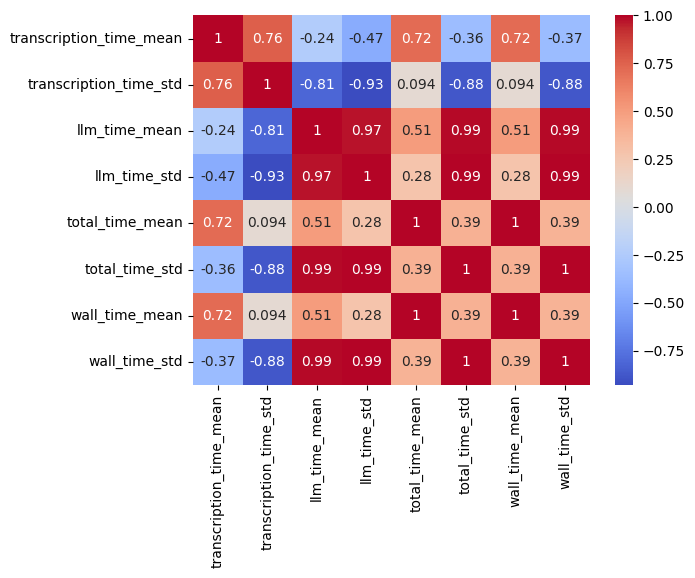

In [50]:
numeric_cols = summary.reset_index().select_dtypes('number').columns
sns.heatmap(summary[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

In [44]:
summary.reset_index()

,setup_name,transcription_time_mean,transcription_time_std,llm_time_mean,llm_time_std,total_time_mean,total_time_std,wall_time_mean,wall_time_std
0,whisper:base.en + llm:gemma:2b,3.329819,0.220788,5.674789,2.264612,9.004615,2.388739,9.061877,2.382353
1,whisper:base.en + llm:phi3:mini,3.311257,0.627507,0.011130,0.011650,3.322391,0.638361,3.345748,0.642869
2,whisper:small.en + llm:phi3:mini,9.577985,0.840014,1.625483,0.103143,11.203506,0.926427,11.267028,0.914800


In [54]:
mean_cols = summary.columns[summary.columns.str.contains('mean')]
summary[mean_cols]

,transcription_time_mean,llm_time_mean,total_time_mean,wall_time_mean
setup_name,,,,
whisper:base.en + llm:gemma:2b,3.329819,5.674789,9.004615,9.061877
whisper:base.en + llm:phi3:mini,3.311257,0.011130,3.322391,3.345748
whisper:small.en + llm:phi3:mini,9.577985,1.625483,11.203506,11.267028
